In [ ]:
'''
Keras MNIST Android 적용
https://heui-yong.github.io/android/post-android-tensorflow-MNIST/


'''

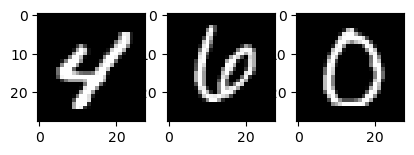

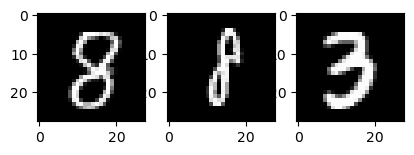

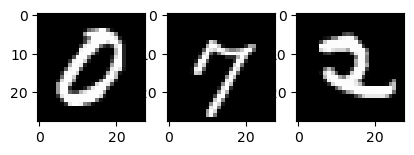

In [7]:
from tensorflow.keras.datasets import mnist
import numpy as np

(x_train,y_train),(x_test,y_test) = mnist.load_data()


import matplotlib.pyplot as plt
import random
for i in range(1,4,1):
    for j in range(1,4,1):
        plt.subplot(i,4,j)
        plt.imshow(x_train[random.randint(0,60000)],cmap="gray")
    plt.show()

In [8]:
from tensorflow.keras.utils import to_categorical

x_train = x_train.reshape(-1,28,28,1)/255.
x_test = x_test.reshape(-1,28,28,1)/255.
y_train = to_categorical(y_train)
y_test = to_categorical(y_test)

In [9]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense,Flatten,BatchNormalization,Conv2D

model = Sequential()
model.add(Conv2D(32,(2,2),activation="relu",input_shape=(28,28,1)))
model.add(BatchNormalization())
model.add(Conv2D(64,(2,2),activation="relu"))
model.add(BatchNormalization())
model.add(Conv2D(128,(2,2),2,activation="relu"))
model.add(BatchNormalization())
model.add(Conv2D(32,(2,2),activation="relu"))
model.add(BatchNormalization())
model.add(Conv2D(64,(2,2),activation="relu"))
model.add(BatchNormalization())
model.add(Conv2D(128,(2,2),2,activation="relu"))
model.add(BatchNormalization())
model.add(Flatten())
model.add(Dense(128,activation="relu"))
model.add(Dense(10,activation="softmax"))

c:\Users\wonta\anaconda3\Lib\site-packages\keras\src\layers\convolutional\base_conv.py:99: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(


In [5]:
model.compile(loss = "categorical_crossentropy",optimizer = "adam",metrics=["acc"])
history = model.fit(x_train,y_train,validation_data=(x_test,y_test),epochs=30,batch_size=256)

Epoch 1/30
235/235 ━━━━━━━━━━━━━━━━━━━━ 65s 251ms/step - acc: 0.8932 - loss: 0.3489 - val_acc: 0.1374 - val_loss: 4.7614
Epoch 2/30
235/235 ━━━━━━━━━━━━━━━━━━━━ 45s 193ms/step - acc: 0.9916 - loss: 0.0283 - val_acc: 0.9256 - val_loss: 0.2206
Epoch 3/30
235/235 ━━━━━━━━━━━━━━━━━━━━ 62s 262ms/step - acc: 0.9945 - loss: 0.0167 - val_acc: 0.9868 - val_loss: 0.0427
Epoch 4/30
235/235 ━━━━━━━━━━━━━━━━━━━━ 63s 266ms/step - acc: 0.9958 - loss: 0.0122 - val_acc: 0.9884 - val_loss: 0.0411
Epoch 5/30
235/235 ━━━━━━━━━━━━━━━━━━━━ 62s 263ms/step - acc: 0.9956 - loss: 0.0119 - val_acc: 0.9898 - val_loss: 0.0362
Epoch 6/30
235/235 ━━━━━━━━━━━━━━━━━━━━ 176s 747ms/step - acc: 0.9976 - loss: 0.0072 - val_acc: 0.9853 - val_loss: 0.0559
Epoch 7/30
235/235 ━━━━━━━━━━━━━━━━━━━━ 44s 189ms/step - acc: 0.9984 - loss: 0.0052 - val_acc: 0.9871 - val_loss: 0.0589
Epoch 8/30
235/235 ━━━━━━━━━━━━━━━━━━━━ 65s 274ms/step - acc: 0.9968 - loss: 0.0099 - val_acc: 0.9890 - val_loss: 0.0411
Epoch 9/30
235/235 ━━━━━━━━━━━━

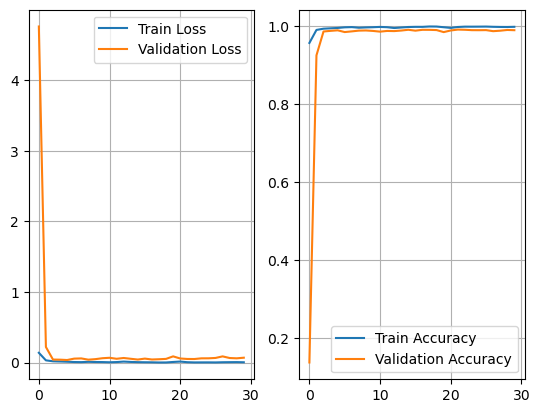

In [12]:
loss = history.history["loss"]
acc = history.history["acc"]
val_loss = history.history["val_loss"]
val_acc = history.history["val_acc"]
plt.subplot(1,2,1)
plt.plot(range(len(loss)),loss,label = "Train Loss")
plt.plot(range(len(val_loss)),val_loss,label = "Validation Loss")
plt.grid()
plt.legend()
plt.subplot(1,2,2)
plt.plot(range(len(acc)),acc,label = "Train Accuracy")
plt.plot(range(len(val_acc)),val_acc,label = "Validation Accuracy")
plt.grid()
plt.legend()
plt.show()

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 132ms/step
Actual : 0	Predict : 6


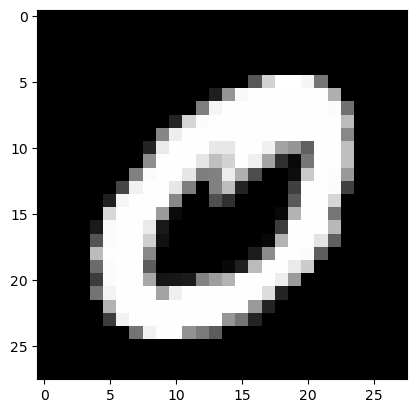

In [13]:
index =random.randint(0,9999)
plt.imshow(x_test[index],cmap="gray")
predict = model.predict(x_test[index].reshape(1,28,28,1))
print("Actual : {}\tPredict : {}".format(np.argmax(y_test[index]),np.argmax(predict)),)

In [15]:
import tensorflow as tf

model.save("tensor_model.h5")
new_model = tf.keras.models.load_model("tensor_model.h5")
convert = tf.lite.TFLiteConverter.from_keras_model(new_model)
tflite_model = convert.convert()
with open('tensor_model.tflite', 'wb') as f:
    f.write(tflite_model)

INFO:tensorflow:Assets written to: C:\Users\wonta\AppData\Local\Temp\tmpl4c394vi\assets


INFO:tensorflow:Assets written to: C:\Users\wonta\AppData\Local\Temp\tmpl4c394vi\assets


Saved artifact at 'C:\Users\wonta\AppData\Local\Temp\tmpl4c394vi'. The following endpoints are available:

* Endpoint 'serve'
  args_0 (POSITIONAL_ONLY): TensorSpec(shape=(None, 28, 28, 1), dtype=tf.float32, name='input_layer_1')
Output Type:
  TensorSpec(shape=(None, 10), dtype=tf.float32, name=None)
Captures:
  2445992105104: TensorSpec(shape=(), dtype=tf.resource, name=None)
  2445992103952: TensorSpec(shape=(), dtype=tf.resource, name=None)
  2445992108752: TensorSpec(shape=(), dtype=tf.resource, name=None)
  2445992104720: TensorSpec(shape=(), dtype=tf.resource, name=None)
  2445992109136: TensorSpec(shape=(), dtype=tf.resource, name=None)
  2445992104336: TensorSpec(shape=(), dtype=tf.resource, name=None)
  2445992106640: TensorSpec(shape=(), dtype=tf.resource, name=None)
  2445992107024: TensorSpec(shape=(), dtype=tf.resource, name=None)
  2445992106448: TensorSpec(shape=(), dtype=tf.resource, name=None)
  2445992104144: TensorSpec(shape=(), dtype=tf.resource, name=None)
  24459

In [ ]:
'''
위 코드로 학습 시킨 모델을 tensor_model.tflite로 저장
지금까지 안드로이드에 적용할 모델의 생성하고, 생성한 모델을 텐서플로 라이트를 사용해서 안드로이드에 적용할 것
'''